jupyter nbconvert git/opdrachtCO2/notebooks/slideshow.ipynb --to slides --post serve

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#from plotnine import *
import numpy as np

In [21]:
energyraw = pd.read_csv('../datasets/renewableenergy.csv')
GDPraw = pd.read_csv('../datasets/GDP.csv')
CO2raw = pd.read_csv('../datasets/CO2emissions.csv')
consumptionraw = pd.read_csv('../datasets/EnergyConsumption.csv')
energy=pd.read_csv('../datasets/EnergyClean.csv')
gdp=pd.read_csv('../datasets/GDPclean.csv')
co2=pd.read_csv('../datasets/CO2clean.csv')
co2inc=pd.read_csv('../datasets/CO2increase.csv')
inc1990=pd.read_csv('../datasets/CO2increase1990.csv')
cons=pd.read_csv('../datasets/consumptionclean.csv')
df=pd.read_csv('../datasets/MergedData.csv',index_col=0)
outer=pd.read_csv('../datasets/MergedDataouter.csv',index_col=0)


- 3 datasets schoongemaakt

voor deze opdracht kregen we 3 datasets een met de totale uitstoot CO2 uit fosiele brandstof, een met het GDP per capita van de landen en een met het persentage hernieuwbare energy dat er gebruikt word.

In [3]:
energyraw.head(3)

Country Name Country Code  \
0        Aruba          ABW   
1  Afghanistan          AFG   
2       Angola          AGO   

                                      Indicator Name  Indicator Code  1960  \
0  Renewable energy consumption (% of total final...  EG.FEC.RNEW.ZS   NaN   
1  Renewable energy consumption (% of total final...  EG.FEC.RNEW.ZS   NaN   
2  Renewable energy consumption (% of total final...  EG.FEC.RNEW.ZS   NaN   

   1961  1962  1963  1964  1965     ...            2009       2010       2011  \
0   NaN   NaN   NaN   NaN   NaN     ...        0.299774   5.464716   5.661789   
1   NaN   NaN   NaN   NaN   NaN     ...       17.813855  14.839809  10.793828   
2   NaN   NaN   NaN   NaN   NaN     ...       55.748971  54.193825  52.715687   

        2012       2013       2014  2015  2016  2017  Unnamed: 62  
0   6.855850   6.894805   6.922234   NaN   NaN   NaN          NaN  
1  13.973584  14.278454  16.748996   NaN   NaN   NaN          NaN  
2  52.245733  50.686111  50.797466   NaN   NaN   NaN          NaN  

[3 rows x 63 columns]

In [4]:
Energy=energyraw.drop(axis=1, columns=['Country Code', 'Indicator Name', 'Indicator Code'])
Energy.dropna(axis=1, thresh=100, inplace=True)
Energy.dropna(axis=0, inplace=True)
Energy.head()

Country Name       1990       1991       1992       1993       1994  \
0        Aruba   0.198601   0.169457   0.173962   0.139492   0.127387   
1  Afghanistan  15.924533  17.036443  26.521627  30.585669  32.796250   
2       Angola  72.255231  71.888622  72.723260  71.277040  72.220252   
3      Albania  25.518087  32.998167  46.813324  51.152049  51.459544   
4      Andorra  14.273550  14.273550  14.308754  13.918955  14.561024   

        1995       1996       1997       1998    ...           2005  \
0   0.111640   0.107174   0.102256   0.099369    ...       0.186599   
1  35.075641  37.945749  41.432601  44.094320    ...      40.859184   
2  73.945868  73.139602  73.734418  76.819784    ...      70.954187   
3  50.609721  51.636363  55.953353  49.983356    ...      36.869483   
4  14.481048  14.100048  14.194002  14.458642    ...      16.902442   

        2006       2007       2008       2009       2010       2011  \
0   0.189937   0.190059   0.193546   0.299774   5.464716   5.661789   
1  37.137254  33.862584  21.343714  17.813855  14.839809  10.793828   
2  65.022575  61.599690  58.107985  55.748971  54.193825  52.715687   
3  31.710194  32.100937  35.912903  37.216639  37.115330  35.962531   
4  17.485996  16.940777  17.422740  17.515951  19.090727  18.971541   

        2012       2013       2014  
0   6.855850   6.894805   6.922234  
1  13.973584  14.278454  16.748996  
2  52.245733  50.686111  50.797466  
3  40.048297  41.288978  38.689497  
4  19.195534  19.563701  19.886327  

[5 rows x 26 columns]

- data mergen

om de data met elkaar te vergelijken moeten we het samen in een dataframe zetten. daarvoor moeten we eerst de dataframes naar long format converteren.

In [5]:
#dataframes voor mergen
energy.head()

Country Name       1990       1991       1992       1993       1994  \
0        Aruba   0.198601   0.169457   0.173962   0.139492   0.127387   
1  Afghanistan  15.924533  17.036443  26.521627  30.585669  32.796250   
2       Angola  72.255231  71.888622  72.723260  71.277040  72.220252   
3      Albania  25.518087  32.998167  46.813324  51.152049  51.459544   
4      Andorra  14.273550  14.273550  14.308754  13.918955  14.561024   

        1995       1996       1997       1998    ...           2005  \
0   0.111640   0.107174   0.102256   0.099369    ...       0.186599   
1  35.075641  37.945749  41.432601  44.094320    ...      40.859184   
2  73.945868  73.139602  73.734418  76.819784    ...      70.954187   
3  50.609721  51.636363  55.953353  49.983356    ...      36.869483   
4  14.481048  14.100048  14.194002  14.458642    ...      16.902442   

        2006       2007       2008       2009       2010       2011  \
0   0.189937   0.190059   0.193546   0.299774   5.464716   5.661789   
1  37.137254  33.862584  21.343714  17.813855  14.839809  10.793828   
2  65.022575  61.599690  58.107985  55.748971  54.193825  52.715687   
3  31.710194  32.100937  35.912903  37.216639  37.115330  35.962531   
4  17.485996  16.940777  17.422740  17.515951  19.090727  18.971541   

        2012       2013       2014  
0   6.855850   6.894805   6.922234  
1  13.973584  14.278454  16.748996  
2  52.245733  50.686111  50.797466  
3  40.048297  41.288978  38.689497  
4  19.195534  19.563701  19.886327  

[5 rows x 26 columns]

In [6]:
#dataframe in long format
energylong=energy.melt(id_vars='Country Name',value_vars=energy.columns[1:],var_name='Year',
                       value_name='renewable energy')
energylong.head()

Country Name  Year  renewable energy
0        Aruba  1990          0.198601
1  Afghanistan  1990         15.924533
2       Angola  1990         72.255231
3      Albania  1990         25.518087
4      Andorra  1990         14.273550

In [7]:
df2=df.drop(['renewable energy','CO2increase','EnergyConsumption'],axis=1)
energylong.Year=pd.to_numeric(energylong.Year)

In [8]:
#gemergde dataframe
df2=df2.merge(energylong)
df2.head()

Country Name  Year           GDP  CO2emission  renewable energy
0    Argentina  1990   5939.756916  112603.3333          8.922904
1    Australia  1990  35827.096720  287305.3333          8.009579
2      Austria  1990  33932.391144   60720.0000         25.135752
3      Belgium  1990  33105.155243  108460.0000          1.269462
4        Benin  1990    609.345624     715.0000         93.703236

- co2 was niet genormaliseert de andere wel dus inplaats van naar co2 te kijken maken we een nieuw dataset co2 increse

toen we de verschillende waarden wouden vergelijken zagen we dat de co2 uitstoot geen rekening hield met de groote van het land terwijl gdp per persoon was en renewable een persentage van het totaal dus voegden we een nieuwe variabele toe: de hoeveelheid co2 uitstoot ten opzichte van 1959.

In [9]:
co2.set_index('Country Name',inplace=True)

In [10]:
co2.head()

1959         1960         1961         1962  \
Country Name                                                              
Afghanistan           385.000000   414.333333   491.333333   689.333333   
Albania              1444.666667  2024.000000  2280.666667  2464.000000   
Algeria              5665.000000  6160.000000  6064.666667  5668.666667   
Angola                619.666667   550.000000   454.666667  1180.666667   
Antigua and Barbuda    29.333333    36.666667    47.666667   102.666667   

                            1963         1964         1965         1966  \
Country Name                                                              
Afghanistan           707.666667   839.666667  1008.333333  1092.666667   
Albania              2082.666667  2016.666667  2174.333333  2552.000000   
Algeria              5426.666667  5650.333333  6596.333333  8429.666667   
Angola               1151.333333  1224.666667  1188.000000  1554.666667   
Antigua and Barbuda    84.333333    91.666667   150.333333   348.333333   

                            1967         1968      ...                2000  \
Country Name                                       ...                       
Afghanistan          1283.333333  1224.666667      ...          781.000000   
Albania              2680.333333  3072.666667      ...         3021.333333   
Algeria              8440.666667  9060.333333      ...        87923.000000   
Angola                993.666667  1672.000000      ...         9540.666667   
Antigua and Barbuda   564.666667   990.000000      ...          344.666667   

                             2001          2002          2003          2004  \
Country Name                                                                  
Afghanistan            645.333333    359.333333    583.000000    733.333333   
Albania               3223.000000   3747.333333   4290.000000   4114.000000   
Algeria              84285.666670  90845.333330  92524.666670  89485.000000   
Angola                9731.333333  12664.666670   9064.000000  18791.666670   
Antigua and Barbuda    344.666667    363.000000    388.666667    407.000000   

                              2005           2006           2007  \
Country Name                                                       
Afghanistan             997.333333    1272.333333    1888.333333   
Albania                4601.666667    4238.666667    4491.666667   
Algeria              107118.000000  107294.000000  112731.666700   
Angola                19154.666670   22264.000000   25149.666670   
Antigua and Barbuda     410.666667     425.333333     436.333333   

                              2008           2009  
Country Name                                       
Afghanistan            3776.666667    6314.000000  
Albania                4128.666667    3006.666667  
Algeria              111294.333300  121300.666700  
Angola                26022.333330   26653.000000  
Antigua and Barbuda     447.333333     462.000000  

[5 rows x 51 columns]

In [11]:
Co2=co2.div(co2['1959'],axis=0)
Co2.head()


1959      1960      1961      1962      1963      1964  \
Country Name                                                                  
Afghanistan           1.0  1.076190  1.276190  1.790476  1.838095  2.180952   
Albania               1.0  1.401015  1.578680  1.705584  1.441624  1.395939   
Algeria               1.0  1.087379  1.070550  1.000647  0.957929  0.997411   
Angola                1.0  0.887574  0.733728  1.905325  1.857988  1.976331   
Antigua and Barbuda   1.0  1.250000  1.625000  3.500000  2.875000  3.125000   

                         1965       1966       1967       1968    ...      \
Country Name                                                      ...       
Afghanistan          2.619048   2.838095   3.333333   3.180952    ...       
Albania              1.505076   1.766497   1.855330   2.126904    ...       
Algeria              1.164401   1.488026   1.489968   1.599353    ...       
Angola               1.917160   2.508876   1.603550   2.698225    ...       
Antigua and Barbuda  5.125000  11.875000  19.250000  33.750000    ...       

                          2000       2001       2002       2003       2004  \
Country Name                                                                 
Afghanistan           2.028571   1.676190   0.933333   1.514286   1.904762   
Albania               2.091371   2.230964   2.593909   2.969543   2.847716   
Algeria              15.520388  14.878317  16.036246  16.332686  15.796117   
Angola               15.396450  15.704142  20.437870  14.627219  30.325444   
Antigua and Barbuda  11.750000  11.750000  12.375000  13.250000  13.875000   

                          2005       2006       2007       2008       2009  
Country Name                                                                
Afghanistan           2.590476   3.304762   4.904762   9.809524  16.400000  
Albania               3.185279   2.934010   3.109137   2.857868   2.081218  
Algeria              18.908738  18.939806  19.899676  19.645955  21.412298  
Angola               30.911243  35.928994  40.585799  41.994083  43.011834  
Antigua and Barbuda  14.000000  14.500000  14.875000  15.250000  15.750000  

[5 rows x 51 columns]

- kijken naar energy consumtie per persoon nieuwe dataset zoeken

voor de laatse vraag moesten we beantwoorden welke landen er het meeste energy per persoon verbruiken 

In [12]:
cons.head()

Country Name         1971         1972         1973         1974  \
0                Angola   555.882556   584.315151   567.561240   564.578294   
1               Albania   785.161526   865.592481   762.725362   776.934749   
2            Arab World   406.167791   410.482134   440.522073   457.175546   
3  United Arab Emirates  3629.594560  3158.757062  3285.547392  2845.355182   
4             Argentina  1380.921398  1379.818923  1411.496781  1415.682954   

          1975         1976         1977         1978         1979  \
0   536.404200   515.448114   493.802229   527.325750   518.222892   
1   826.952081   890.953360   923.728868  1010.819221   864.199460   
2   481.398699   522.127750   558.390550   623.695918   724.831609   
3  3495.051630  3803.823521  5490.272244  5597.223624  5849.811983   
4  1378.546993  1404.744778  1420.567765  1426.919260  1484.565823   

      ...               2004         2005         2006         2007  \
0     ...         462.157545   430.935067   456.246913   469.620202   
1     ...         715.414483   719.584378   706.859408   679.861765   
2     ...        1422.614685  1477.470405  1543.813654  1575.160534   
3     ...       10238.100888  9716.633818  8812.966422  8295.734644   
4     ...        1717.650525  1709.572352  1840.440442  1845.098116   

          2008         2009         2010         2011         2012  \
0   490.536421   514.411354   520.675116   521.825839   552.622932   
1   710.748498   732.316682   729.154373   764.968617   687.896260   
2  1658.964972  1704.612291  1764.528429  1730.343357  1840.176074   
3  8604.064414  7820.254845  7458.879459  7418.413775  7683.884405   
4  1923.139812  1850.861533  1908.280560  1933.523032  1920.080959   

          2013  
0   534.119063  
1   801.329975  
2  1796.943956  
3  7766.665375  
4  1951.439454  

[5 rows x 44 columns]

In [13]:
df.head()

Country Name  Year           GDP  CO2emission  renewable energy  \
0    Argentina  1990   5939.756916  112603.3333          8.922904   
1    Australia  1990  35827.096720  287305.3333          8.009579   
2      Austria  1990  33932.391144   60720.0000         25.135752   
3      Belgium  1990  33105.155243  108460.0000          1.269462   
4        Benin  1990    609.345624     715.0000         93.703236   

   CO2increase  EnergyConsumption  
0     2.298309        1407.386750  
1     3.429297        5061.508459  
2     2.173228        3240.111359  
3     1.227029        4809.867268  
4     6.964286         333.698169

- relaties in kaart brenen

[]

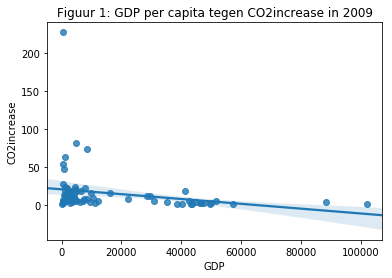

In [14]:
sns.regplot(data=df[df.Year==2009],x='GDP',y='CO2increase')
#plt.ylim(-10,50)
plt.title('Figuur 1: GDP per capita tegen CO2increase in 2009')
plt.plot()

In deze regressieplot wordt de relatie weergegeven tussen de variabelen GDP (per capita) en de variabele 
CO2increase (relatief ten op zichte van 1959). De trendlijn laat zien dat er een lichte afname is bij een toenemende GDP per capita. Bij een GDP van $0-20.000 zijn er een aantal uitschieters naar boven. In de volgende figuur worden deze eruitgefiltert zodat deze geen invloed meer hebben op de trendlijn. De uitschieter linksboven is Burkina Faso?? De twee landen rechtsonderin zijn ...

[]

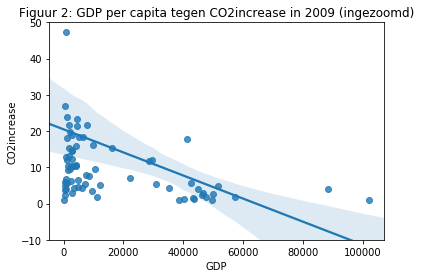

In [15]:
sns.regplot(data=df[df.Year==2009],x='GDP',y='CO2increase')
plt.ylim(-10,50)
plt.title('Figuur 2: GDP per capita tegen CO2increase in 2009 (ingezoomd)')
plt.plot()

Conclusie: in landen met een hoog gdp is de uitstoot van CO2 in 2009 minder toegenomen ten opzichte van 1959 dan in landen met een laag GDP.

[]

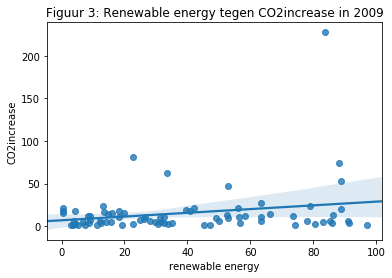

In [16]:
sns.regplot(data=df[df.Year==2009],x='renewable energy',y='CO2increase')
#plt.ylim(-10,50)
plt.title('Figuur 3: Renewable energy tegen CO2increase in 2009')
plt.plot()

In figuur 3 wordt de variabele Renewable energy (% of total final energy consumption) afgezet tegen CO2increase (relatief ten op zichte van 1959). Er is een stijgende trendlijn te zien met een aantal uitschieters naar boven. De uitschieter rechtsboven in de grafiek heeft een waarde van boven de 200. Dit betekent grofweg 200 keer zoveel uitstoot van CO2 ten opzichte van 1959. Deze uitschieter is het land Burkina Faso.

[]

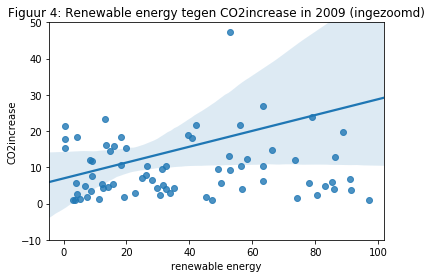

In [17]:
sns.regplot(data=df[df.Year==2009],x='renewable energy',y='CO2increase')
plt.ylim(-10,50)
plt.title('Figuur 4: Renewable energy tegen CO2increase in 2009 (ingezoomd)')
plt.plot()

In [18]:
df[df.Year==2009].sort_values('CO2increase',ascending=False).head()

Country Name  Year          GDP    CO2emission  renewable energy  \
1468  Burkina Faso  2009   562.841935    1668.333333         83.743164   
1532      Thailand  2009  4743.690472  271696.333300         22.657367   
1490         Gabon  2009  8449.939756    1624.333333         88.095158   
1513    Mauritania  2009  1182.378370    2075.333333         33.425575   
1518         Nepal  2009   570.930789    3516.333333         88.927086   

      CO2increase  EnergyConsumption  
1468   227.500000                NaN  
1532    81.696803        1610.321449  
1490    73.833333        2851.200627  
1513    62.888889                NaN  
1518    53.277778         370.915179

Conclusie: in landen waar een hoog percentage hernieuwbare energie wordt gebruikt geeft de trendlijn aan dat er ook meer CO2increase is, maar kijkend naar de datapunten lijkt het erop dat deze ongeveer gelijk blijft. 

In [23]:
df[df.Year==2009].sort_values('EnergyConsumption',ascending=False).head()

Country Name  Year            GDP   CO2emission  \
1499              Iceland  2009   43152.692285  2.027667e+03   
1533  Trinidad and Tobago  2009   16226.513107  4.777667e+04   
1507           Luxembourg  2009  101939.613398  1.014200e+04   
1473               Canada  2009   46543.792200  5.138907e+05   
1537        United States  2009   47575.608563  5.299081e+06   

      renewable energy  CO2increase  EnergyConsumption  
1499         74.123664     1.636095       16911.079784  
1533          0.400455    15.438389       14203.152499  
1507          3.736661     0.972574        7951.723944  
1473         22.584613     2.783223        7797.196259  
1537          7.354408     1.875325        7056.783653